# Problem Statement


What does Hospital can know about patient drom his DICONS before he arrives? Specifically:

- Do they know that he has a broken foot? Why or why not?
- Do they know what the results were of Jerry's blood work? Why or why not?
- Do they know that he has a history of low blood pressure? Why or why not?

In [1]:
import numpy as np
import pandas as pd
import glob as gb
import pydicom
import matplotlib.pyplot as plt

In [2]:
# Reading all the dicoms Files
dicoms = gb.glob("*.dcm")

In [3]:
dcm1 = pydicom.dcmread(dicoms[0])
dcm1

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.11129.5.5.185126564350931428005573856598500696723485
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 1.2.0'
-------------------------------------------------
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.11129.5.5.185126564350931428005573856598500696723485
(0008, 0060) Modality                            CS: 'DX'
(0008, 1030) Study Description                   LO: 'Infiltration|Nodule'
(0010, 002

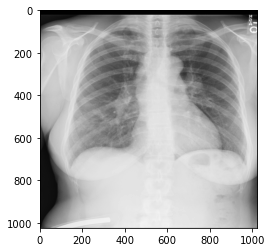

In [4]:
plt.imshow(dcm1.pixel_array,cmap='gray')


In [5]:
dcm1.PatientID

'1688'

(array([6.5200e+02, 2.0934e+04, 3.1800e+02, 3.9500e+02, 2.2900e+02,
        1.0000e+00, 3.0000e+00, 3.7000e+01, 1.3500e+02, 2.1400e+02,
        1.0400e+02, 5.2500e+02, 2.0580e+03, 2.4470e+03, 3.1610e+03,
        3.4470e+03, 5.8120e+03, 3.6590e+03, 8.7700e+02, 6.9800e+02,
        5.9500e+02, 5.7000e+02, 5.1400e+02, 3.9900e+02, 2.7900e+02,
        2.4600e+02, 2.3700e+02, 2.2700e+02, 2.6500e+02, 3.2800e+02,
        2.4700e+02, 2.5400e+02, 2.4500e+02, 2.2900e+02, 2.9200e+02,
        2.3900e+02, 2.0000e+02, 2.1600e+02, 2.1700e+02, 2.3800e+02,
        2.0900e+02, 2.6900e+02, 2.3200e+02, 2.6100e+02, 2.6600e+02,
        2.8000e+02, 2.6000e+02, 2.8500e+02, 3.0800e+02, 2.8200e+02,
        2.9100e+02, 0.0000e+00, 3.2200e+02, 3.0800e+02, 3.5000e+02,
        4.1200e+02, 4.5200e+02, 4.8500e+02, 5.8200e+02, 7.0500e+02,
        8.4600e+02, 9.3000e+02, 9.8400e+02, 9.5800e+02, 9.6900e+02,
        1.0200e+03, 9.6600e+02, 1.0420e+03, 1.1330e+03, 1.3190e+03,
        1.3880e+03, 1.5170e+03, 1.6120e+03, 1.64

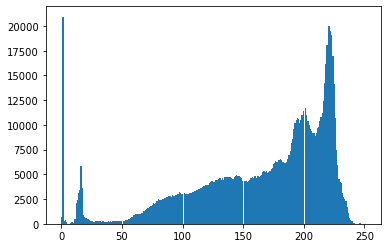

In [6]:
plt.hist(dcm1.pixel_array.ravel(), bins = 256)

## Normalizing Photo

In [7]:
mean_intensity = np.mean(dcm1.pixel_array)
std_intensity = np.std(dcm1.pixel_array)
new_img = dcm1.pixel_array.copy()
new_img = (new_img - mean_intensity)/std_intensity

(array([6.5200e+02, 2.0934e+04, 3.1800e+02, 3.9500e+02, 2.2900e+02,
        1.0000e+00, 3.0000e+00, 3.7000e+01, 1.3500e+02, 2.1400e+02,
        1.0400e+02, 5.2500e+02, 2.0580e+03, 2.4470e+03, 3.1610e+03,
        3.4470e+03, 5.8120e+03, 3.6590e+03, 8.7700e+02, 6.9800e+02,
        5.9500e+02, 5.7000e+02, 5.1400e+02, 3.9900e+02, 2.7900e+02,
        2.4600e+02, 2.3700e+02, 2.2700e+02, 2.6500e+02, 3.2800e+02,
        2.4700e+02, 2.5400e+02, 2.4500e+02, 2.2900e+02, 2.9200e+02,
        2.3900e+02, 2.0000e+02, 2.1600e+02, 2.1700e+02, 2.3800e+02,
        2.0900e+02, 2.6900e+02, 2.3200e+02, 2.6100e+02, 2.6600e+02,
        2.8000e+02, 2.6000e+02, 2.8500e+02, 3.0800e+02, 2.8200e+02,
        2.9100e+02, 0.0000e+00, 3.2200e+02, 3.0800e+02, 3.5000e+02,
        4.1200e+02, 4.5200e+02, 4.8500e+02, 5.8200e+02, 7.0500e+02,
        8.4600e+02, 9.3000e+02, 9.8400e+02, 9.5800e+02, 9.6900e+02,
        1.0200e+03, 9.6600e+02, 1.0420e+03, 1.1330e+03, 1.3190e+03,
        1.3880e+03, 1.5170e+03, 1.6120e+03, 1.64

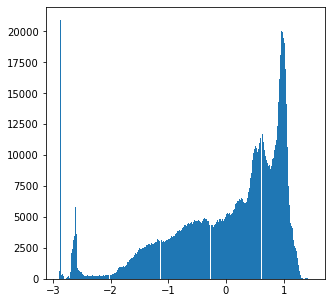

In [8]:
plt.figure(figsize=(5,5))
plt.hist(new_img.ravel(), bins = 256)

In [9]:
## Do some exploratory work before about how to extract these attributes using pydicom... 
print(f'ID: {dcm1.PatientID}')
print(f'Sex: {dcm1.PatientSex}')
print(f'Age: {dcm1.PatientAge}')
print(f'Modality (Acquisition Method): {dcm1.Modality}')
print(f'Study Description: {dcm1.StudyDescription}')

print("Image Size :-")
print(f'Rowsb (Image Height): {dcm1.Rows}')
print(f'Columns (Image Weidth): {dcm1.Columns}')

ID: 1688
Sex: F
Age: 59
Modality (Acquisition Method): DX
Study Description: Infiltration|Nodule
Image Size :-
Rowsb (Image Height): 1024
Columns (Image Weidth): 1024


### Now, let's create the dataframe that we want, and populate it in a loop with all of our DICOMS:


In [10]:
data = {
    'ID': [],
    'Sex': [],
    'Age': [],
    'Modality': [],
    'Findings': [],
    'Rows': [],
    'Columns': [],

}

In [11]:
for i in dicoms:
    dcm = pydicom.dcmread(i)
    pid = dcm.PatientID
    sex = dcm.PatientSex
    age = dcm.PatientAge
    mod = dcm.Modality
    study_desc = dcm.StudyDescription
    rows = dcm.Rows
    cols = dcm.Columns
    
    data['ID'].append(pid)
    data['Sex'].append(sex)
    data['Age'].append(age)
    data['Modality'].append(mod)
    data['Findings'].append(study_desc)
    data['Rows'].append(rows)
    data['Columns'].append(cols)

    


In [12]:
df = pd.DataFrame.from_dict(data)
df

,ID,Sex,Age,Modality,Findings,Rows,Columns
0,1688,F,59,DX,Infiltration|Nodule,1024,1024
1,5066,M,52,DX,Cardiomegaly|Effusion|Infiltration,1024,1024
2,10172,F,59,DX,Atelectasis|Effusion,1024,1024
3,13118,M,69,DX,Atelectasis,1024,1024
4,13659,F,62,DX,Consolidation|Mass|Pneumonia|Pneumothorax,1024,1024
5,23075,M,31,DX,Mass,1024,1024
6,29579,F,24,DX,Effusion|Nodule|Pleural_Thickening|Mass,1024,1024
